In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
class muon_distribution:
    
    # a*math.exp(-(x-mean)/(2*c*c))
    def __init__(self, lifetime):
        self.lifetime = lifetime
        
    def evaluate_md(self,t):
        return (1/self.lifetime)*math.exp(-t/self.lifetime)
    
    def maximum(self):
        return 1.0
        
    def random_val(self,choice='calum'):
        
        if choice=='numpy':
            x1 = np.random.exponential(scale=self.lifetime)

        elif choice=='calum':
            x1 = 0 
            y1 = 0
            y2 = 1
        
            while ( y2 > y1 ):
                x1 = np.random.uniform() 
                x1 = x1*self.lifetime*10.
                y1 = self.evaluate_md(x1)
                y2 = np.random.uniform() * self.maximum()
            

        return x1
    
    def numeric_integral(self,lo,hi,npoints=100000):
        
        sumf = 0
        
        for i in range(0,npoints):
            x = lo+np.random.uniform()*(hi-lo)
            sumf += self.evaluate_md(x)
            
        return sumf*(hi-lo)/npoints
    
    def observation(self,choice='calum'):
        results = []
        for i in range(0,1000):
            results.append(test.random_val(choice=choice))
        # average decay time
        return np.mean(results)

In [51]:
test = muon_distribution(2.2)

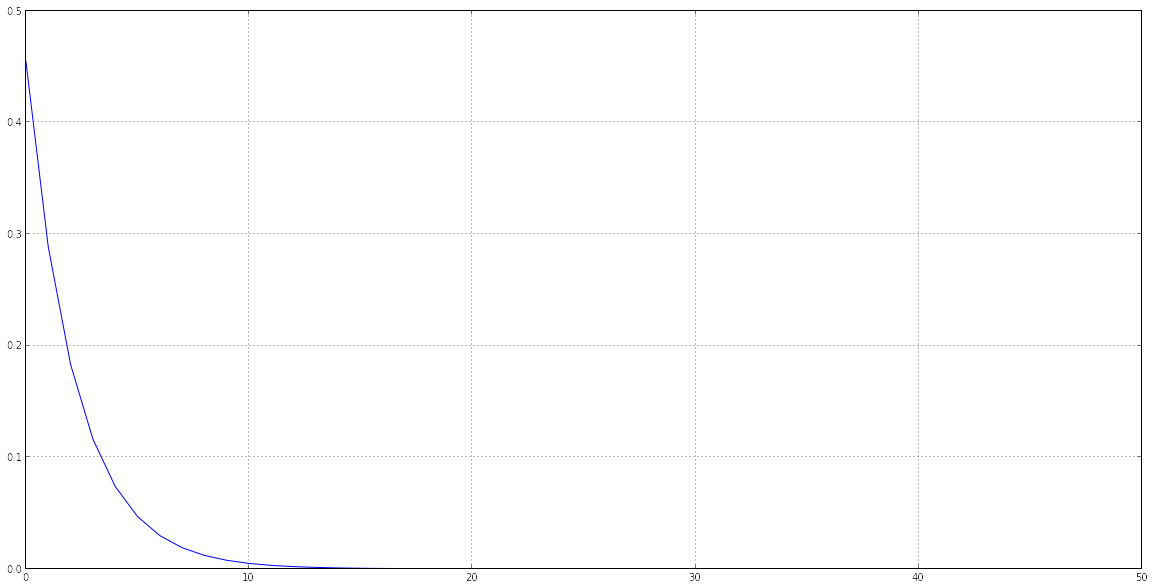

In [52]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot([x for x in range(0,50)],[test.evaluate_md(x) for x in range(0,50)],'-')

In [53]:
results = []
for i in range(0,1000):
    results.append(test.random_val(choice='calum'))   

(0, 20)

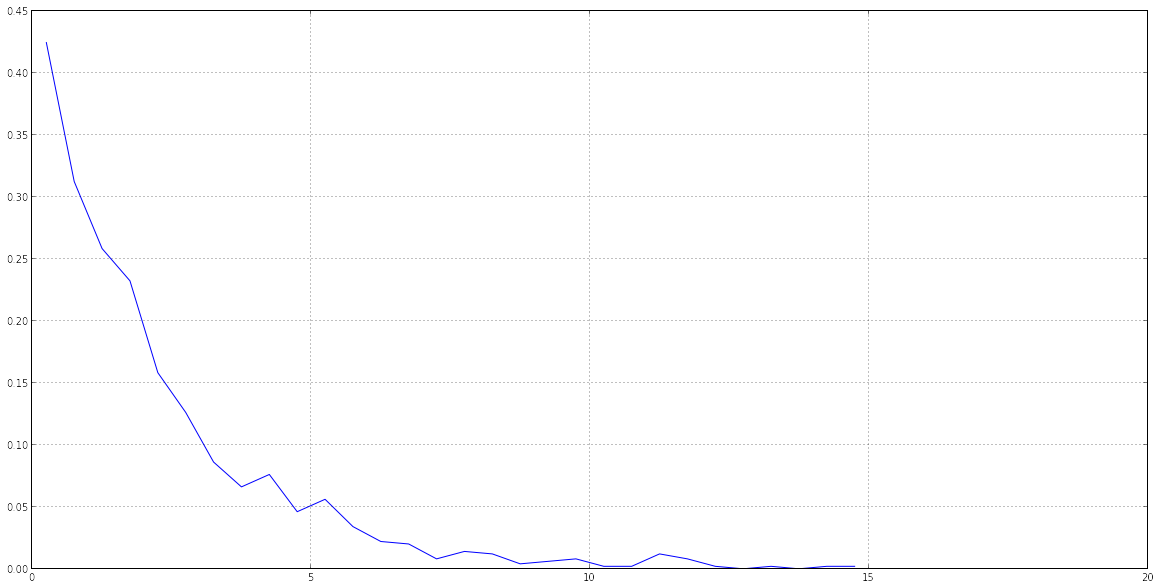

In [54]:
n, bins = np.histogram(results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
plt.xlim(0,20)

In [65]:
test = muon_distribution(2.2)
results = []
for _ in range(0,500):
    results.append(test.observation())
    
len(results), np.mean(results)

(500, 2.196719136974115)

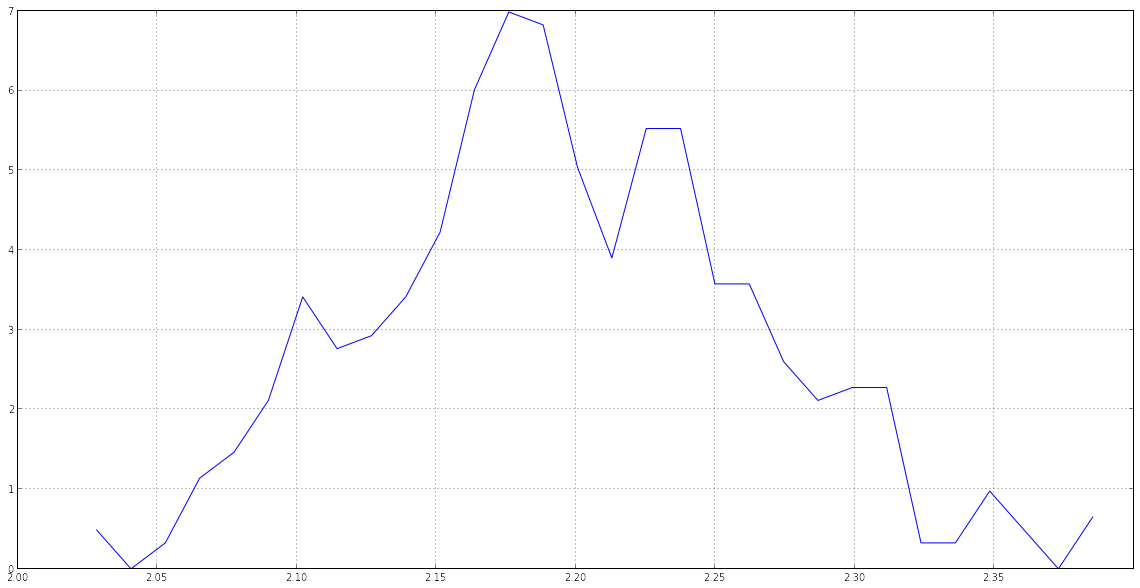

In [66]:
n, bins = np.histogram(results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)

In [62]:
test = muon_distribution(2.2)
results = []
for _ in range(0,500):
    results.append(test.observation(choice='numpy'))
    
len(results), np.mean(results)

(500, 2.1991052482080642)

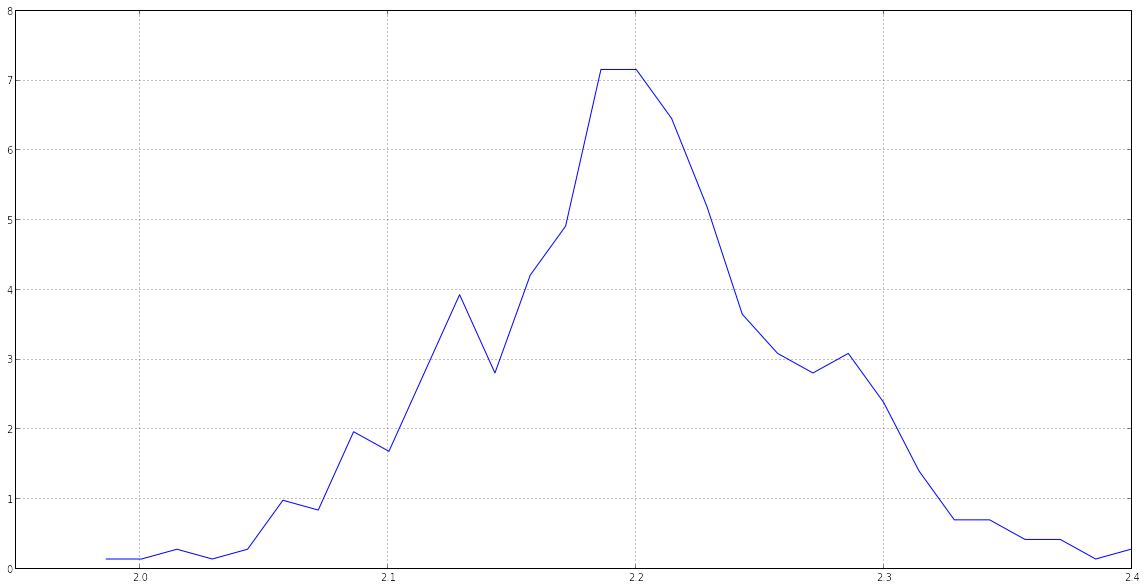

In [63]:
n, bins = np.histogram(results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)

In [59]:
np.var(results)

0.0050103083942188752